## Compute best errors from all 28 elements at once  - 10^5 samples

Populating the interactive namespace from numpy and matplotlib
[ 0.00330303  0.00529684  0.0084563   0.01738961  0.02170482]


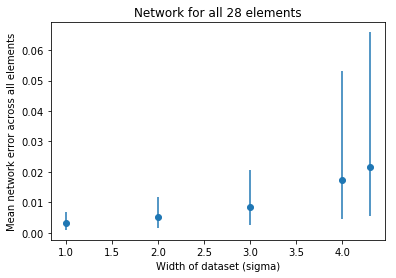

In [2]:
%pylab inline
from Chempy.neural import create_network
from Chempy.neural import neural_output

# Create neural network

#create_network(learning_rate=0.007,Plot=False)

widths = [1.0,2.0,3.0,4.0,4.3]
err_median = []
err_up = []
err_low = []
for width in widths:
    # Use training data of restricted sigma ranges
    tr_abun = np.load('Neural/'+str(width)+'_sigma_abundances.npy')[:]
    tr_param = np.load('Neural/'+str(width)+'_sigma_param_grid.npy')
    
    err = []
    for i,param in enumerate(tr_param):
        neural_abun = neural_output(param)
        temp_err = (np.absolute(neural_abun-tr_abun[i]))
        err.append(temp_err)
    err_median.append(np.percentile(err,50,axis=0))
    err_up.append(np.percentile(err,100-15.865,axis=0))
    err_low.append(np.percentile(err,15.865,axis=0))

j=0 # Element index                

errorbar_widths = [np.array(err_median)[:,j]-np.array(err_low)[:,j],np.array(err_up)[:,j]-np.array(err_median)[:,j]]
plt.errorbar(widths,np.array(err_median)[:,j],yerr = errorbar_widths,fmt='o')
plt.ylabel('Mean network error across all elements')
plt.xlabel('Width of dataset (sigma)')
plt.title('Network for all 28 elements')
print(np.array(err_median)[:,j])

Populating the interactive namespace from numpy and matplotlib
Using all elements simultaneously
Training epoch 0 of 1000 complete


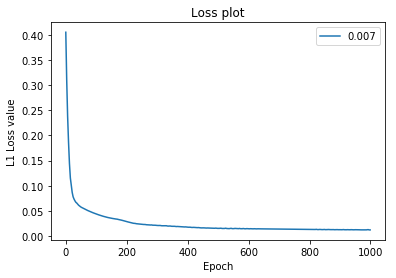

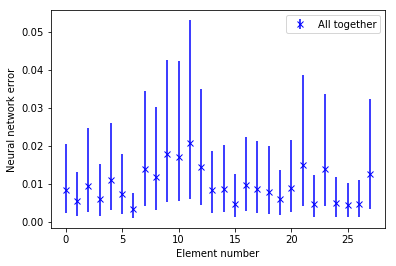

In [1]:
%pylab inline
print('Using all elements simultaneously')
from Chempy.neural import create_network
from Chempy.neural import neural_output
from Chempy.parameter import ModelParameters
a = ModelParameters()
create_network(learning_rate=0.007,Plot=True)

from Chempy.score_function import preload_params_mcmc
preload=preload_params_mcmc()


elements = []
for item in a.elements_to_trace:
    if item in preload.wildcard.dtype.names:
        elements.append(item)

width=3.
# Use training data of restricted sigma ranges
tr_abun = np.load('Neural/'+str(width)+'_sigma_abundances.npy')[:]
tr_param = np.load('Neural/'+str(width)+'_sigma_param_grid.npy')
  
err = []
for j,param in enumerate(tr_param):
    neural_abun = neural_output(param)
    temp_err = (np.absolute(neural_abun-tr_abun[j]))
    err.append(temp_err)
err_med2=(np.percentile(err,50,axis=0))
up_bar2=(np.percentile(err,100-15.865,axis=0)-np.percentile(err,50,axis=0))
low_bar2=(np.percentile(err,50,axis=0)-np.percentile(err,15.865,axis=0))

# Plot for each element
x = range(len(elements))
plt.clf()
errorbars2 = [low_bar2,up_bar2]
plt.errorbar(x,err_med2,yerr=errorbars2,c='b',fmt='x',label='All together')
plt.xlabel('Element number')
plt.ylabel('Neural network error')
plt.legend()

In [4]:
from scipy.stats import norm
norm.ppf(1/12)*2

-2.7659882542012761